In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pickle
import pyscenic
import adjustText
from pyscenic.rss import regulon_specificity_scores
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
sc.logging.print_header()

/home/jovyan/my-conda-envs/pyscenic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.3 pynndescent==0.5.8


# Goal
This notebook creates main fig 5e from output of 01.stable_regulons.ipynb (prev endo_scenic_multirun_compile.ipynb)
# Input
1. stable_regulons_rss.pk - mean regulon-celltype weights (prev regulons_stable_80pct_rss.csv)

In [3]:
path='../../../data.nfs/from.stephane/20220120_GambardellaL_HM_mnsc/'

# plot main fig 5e

In [4]:
with open('stable_regulons_rss.pk', 'rb') as handle:
    rssnf = pickle.load(handle)
# this is almost identical (differences are likely due to rounding), figures are indistinguishable by eye (except positioning of labels that is stochastic and functions seems to have no seed option)
# path='../../../data.nfs/from.stephane/20220120_GambardellaL_HM_mnsc/'
# rssnf = pd.read_csv(path+'/Data/Scenic/All200c/Output/regulons_stable_80pct_rss.csv',index_col=0).T


In [5]:
xcelltype = 'fetal_Capillary arterioles'
ycelltype = 'organoid_Capillary arterioles'
ntop = 20
topreg = sorted(list(set(rssnf[xcelltype].sort_values(ascending=False).index[:ntop]).union(rssnf[ycelltype].sort_values(ascending=False).index[:ntop])))
topreg

['BCL6B(+)',
 'BRF1(+)',
 'E2F4(+)',
 'ELF4(+)',
 'ELK3(+)',
 'ERF(+)',
 'ERG(+)',
 'ETV3L(+)',
 'FLI1(+)',
 'FOXK2(+)',
 'GATA2(+)',
 'HOXD10(+)',
 'IRF2(+)',
 'LTF(+)',
 'LYL1(+)',
 'MECOM(+)',
 'MLXIP(+)',
 'NKX3-1(+)',
 'PML(+)',
 'SMAD1(+)',
 'SOX17(+)',
 'SOX7(+)',
 'TAL1(+)']

Text(0.5, 1.0, 'Capillary arterioles regulon specificity score')

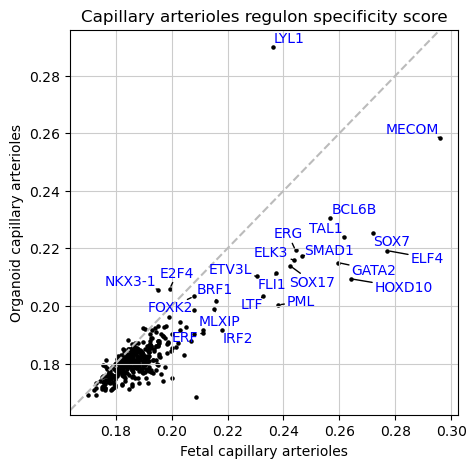

In [6]:
plt.rcParams['figure.figsize'] = [5, 5]
fig,ax = plt.subplots(1,1)
ax.scatter(rssnf[xcelltype], rssnf[ycelltype],c='black',s=5)
labs = [ax.text(rssnf.loc[c,xcelltype], rssnf.loc[c,ycelltype],c.replace('(+)',''),c='blue' )for c in topreg]
adjustText.adjust_text(
    labs,
    arrowprops=dict(arrowstyle='-', color='black')
)

ax.set_xlabel(xcelltype.replace('_',' ').capitalize())
ax.set_ylabel(ycelltype.replace('_',' ').capitalize())
ax.grid(c='#CCCCCC',linestyle='-')
ax.axline((0.2,0.2),slope=1,linestyle='--',c='#BBBBBB')
ax.set_title('Capillary arterioles regulon specificity score')

In [7]:
fig.savefig('../../../figures/paper.figures/5e.capillary_arterioles.regulons.scatterplot.pdf')

# Experiments
## Input data

In [5]:
whole = sc.read_h5ad('../../../data.nfs/from.stephane/skin/20210611_final_object/fetal_skin.norm.maternal_removed.20220202.h5ad')
whole

AnnData object with n_obs × n_vars = 186533 × 28885
    obs: 'sanger_id', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'independent_annotation_refined_20220201a', 'independent_annotation_refined_20220201b', 'independent_annotation_broad1_20220201', 'independent_annotation_broad2_20220201', 'independent_annotation_broad3_20220201', 'joint_annotation_20220201a', 'joint_annotation_20220201b', 'fig1b_annotation_20220201', 'joint_annotation_20220202', 'independent_annotation_refined_20220202', 'fig1b_annotation_20220202'
    var: 'gene_ids', 'mit

In [2]:
a200c = sc.read_h5ad('../../../data.nfs/from.stephane/20220120_GambardellaL_HM_mnsc/Data/Scenic/Hdf5/fskOrg_All200c_hm.h5ad')
a200c

AnnData object with n_obs × n_vars = 8429 × 25431
    obs: 'sanger_id', 'chemistry', 'batch', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'independent_annotation_refined_20220201a', 'independent_annotation_refined_20220201b', 'independent_annotation_broad1_20220201', 'independent_annotation_broad2_20220201', 'independent_annotation_broad3_20220201', 'joint_annotation_20220201a', 'joint_annotation_20220201b', 'fig1b_annotation_20220201', 'joint_annotation_20220202', 'independent_annotation_refined_20220202', 'annot', 'day', 'sample_id', 'version', 'week', 'nh3_an

In [25]:
# neither works
#withorg = sc.read_h5ad('../../../data.nfs/from.stephane/skin/data/h5ad/organoid_day13_29_48_85_133.cellxgene.h5ad')
withorg = sc.read_h5ad('../../../data.nfs/from.stephane/skin/20200427_organoid_integration/organoid_concatenated.raw.h5ad')
withorg

/home/jovyan/my-conda-envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 147089 × 32991
    obs: 'day', 'sample_id', 'strain', 'version', 'week'
    var: 'gene_symbols', 'gene_ids'

In [18]:
Counter(a200c.obs.index.isin(whole.obs.index))

Counter({False: 8429})

In [26]:
Counter(a200c.obs.index.isin(withorg.obs.index))

Counter({False: 8429})

## Combining pyscenic outputs

In [15]:
regs = [pickle.load(open("../../../data.nfs/from.stephane/20220120_GambardellaL_HM_mnsc/Data/Scenic/All200c"+str(i)+"/Output/regulons.p",'rb')) for i in range(0,10)]

In [24]:
r = regs[0][0]
r

Regulon(name='ACO1(+)', gene2weight=frozendict.frozendict({'HOXA13': 0.5954306183741993, 'ABCA1': 0.4892569708861186, 'APOLD1': 3.0547961766281255, 'EMX2': 0.5185076361822247, 'FGFR1': 1.295802095932558, 'CRLF1': 0.628926579545509, 'FBN1': 0.7612845549147652, 'GTF2A1': 5.020861852095387, 'TRPS1': 0.403350038864904, 'PLEKHA5': 0.5796617419882228, 'NKD1': 1.6444918687325247, 'HOXC6': 0.5001653929675269, 'RXRA': 0.523011913601623, 'OVOL1': 1.8388649705046967, 'ATF7IP': 2.7475342769411113, 'PPM1B': 0.827826574340409, 'WNT11': 0.9180820134874988, 'NUP160': 0.43406224512400277, 'EAPP': 0.5894235733163835, 'SRGAP2B': 0.44719969152867395, 'EIF4G3': 1.0186120628347226, 'POU2F1': 0.4182523108500465, 'TBL1X': 0.7128062467186376, 'PHACTR2': 2.18665134418145, 'HMG20B': 0.8293092373608946, 'TWIST1': 0.8608687827573251, 'CREBBP': 0.7353998626560608, 'EBF3': 0.9927402981824986, 'ZCCHC24': 1.4189657243014686, 'CCDC144A': 1.4480004237106763, 'SMARCD2': 0.7361711000100882, 'PTPRG': 0.48261848184227085, '

In [13]:
Counter([type(t) for t in regs[0]])

Counter({ctxcore.genesig.Regulon: 476})

In [32]:
Counter([sorted(list(t.context))[0] for t in regs[0]])

Counter({'activating': 476})

In [33]:
Counter([len(t.context) for t in regs[0]])

Counter({2: 476})

In [36]:
Counter(Counter([t.name for t in regs[0]]).values())

Counter({1: 476})

In [38]:
regs[0][0].score

3.0182885566681334

### GATA2

In [27]:
gata = [r for rs in regs for r in rs if r.name == 'GATA2(+)']

In [34]:
targn = Counter([i for r in gata for i in r.gene2weight.keys()])
{k:v for (k,v) in targn.items() if v == 10}

{'RASGRP3': 10,
 'EMCN': 10,
 'LIMS1': 10,
 'FLI1': 10,
 'CXorf36': 10,
 'ARHGEF7': 10,
 'ZNF366': 10,
 'TLR4': 10,
 'TIE1': 10,
 'STAB1': 10,
 'RHOJ': 10,
 'CYTL1': 10,
 'VWF': 10,
 'GRAPL': 10,
 'NDST1': 10,
 'PRKCH': 10,
 'GMFG': 10,
 'BTNL9': 10,
 'EIF1AD': 10,
 'ADGRF5': 10,
 'RAP1GAP2': 10,
 'RAMP2': 10,
 'USHBP1': 10,
 'MYCT1': 10,
 'FCER1G': 10,
 'HID1-AS1': 10,
 'NOTCH4': 10,
 'SOX13': 10,
 'CLEC1A': 10,
 'PCAT19': 10,
 'CSF1': 10,
 'RAB33A': 10,
 'FLT1': 10,
 'RND1': 10,
 'NAV3': 10,
 'ARHGEF28': 10,
 'SEMA6B': 10,
 'HES5': 10,
 'BTBD3': 10,
 'MID1': 10,
 'ARHGAP25': 10,
 'TAL1': 10,
 'EPAS1': 10,
 'UNCX': 10,
 'PHLPP1': 10,
 'RREB1': 10,
 'PIEZO1': 10,
 'SOX7': 10,
 'SNRK': 10,
 'H3F3A': 10,
 'RFX3': 10,
 'HOXD1': 10,
 'MLLT6': 10,
 'SPTBN1': 10,
 'CALB2': 10,
 'MECOM': 10,
 'SOCS3': 10,
 'PIM3': 10,
 'MADCAM1': 10,
 'ZHX2': 10,
 'GATA2': 10,
 'RGS16': 10,
 'CAV1': 10,
 'MAFF': 10,
 'SRGAP2B': 10,
 'EPN1': 10,
 'TAF1C': 10,
 'TRAF7': 10,
 'TCTEX1D1': 10,
 'RAPGEF3': 10,
 'MA

In [39]:
gids = ['BCL6B','LYL1','SOX7','MECOM','ELF4','GATA2']
{g:targn[g] for g in gids}

{'BCL6B': 10, 'LYL1': 0, 'SOX7': 10, 'MECOM': 10, 'ELF4': 0, 'GATA2': 10}

seems I do not need them (maybe just to filter unstable), regulon scores are taken from aucs
## auc

In [45]:
aucs = [pd.read_csv("../../../data.nfs/from.stephane/20220120_GambardellaL_HM_mnsc/Data/Scenic/All200c"+str(i)+"/Output/auc_mtx.csv.gz",index_col='Cell') for i in range(0,10)]

In [47]:
aucs[0].head()

,ACO1(+),AHCTF1(+),ALX1(+),ALX4(+),AR(+),ARID3A(+),ARID5B(+),ARNT(+),ARNT2(+),ARNTL(+),...,ZNF740(+),ZNF76(+),ZNF768(+),ZNF778(+),ZNF787(+),ZNF8(+),ZNF816(+),ZNF84(+),ZNF91(+),ZNF93(+)
Cell,,,,,,,,,,,,,,,,,,,,,
CCTATTAAGCGATCCC-1-FCAImmP7528291-fetal,0.088960,0.009538,0.000000,0.064266,0.111609,0.053556,0.152388,0.041277,0.043657,0.044049,...,0.000000,0.005973,0.035354,0.000000,0.201059,0.050646,0.000000,0.033798,0.050143,0.020764
GATTCAGTCTTGGGTA-1-FCAImmP7528291-fetal,0.037083,0.005439,0.019852,0.070644,0.193251,0.090425,0.237569,0.000000,0.014649,0.032646,...,0.008876,0.024657,0.038363,0.000000,0.251585,0.043682,0.301751,0.018090,0.028326,0.017030
AAAGATGCAATGGACG-1-FCAImmP7555848-fetal,0.012347,0.005465,0.000000,0.011636,0.203816,0.038454,0.153221,0.057456,0.051559,0.040403,...,0.000000,0.041218,0.018312,0.067240,0.227211,0.063491,0.041804,0.036785,0.057886,0.015886
AACACGTAGATCGATA-1-FCAImmP7555848-fetal,0.010501,0.000000,0.000000,0.058883,0.100250,0.029720,0.160318,0.155514,0.012372,0.019156,...,0.110576,0.010218,0.015999,0.000000,0.209219,0.065877,0.000000,0.036280,0.028977,0.000000
ACGAGGAAGCTGTCTA-1-FCAImmP7555848-fetal,0.077665,0.015691,0.000000,0.088949,0.283607,0.089777,0.275412,0.008574,0.031166,0.052350,...,0.000000,0.063285,0.000000,0.027471,0.060046,0.051836,0.000000,0.030774,0.050173,0.049813


In [53]:
[all(a200c.obs.index==aucs[i].index) for i in range(0,len(aucs))]

[True, True, True, True, True, True, True, True, True, True]

In [70]:
t = regulon_specificity_scores(aucs[0],a200c.obs.annotToUse2).T
t.head()

,fetal_Adipocytes,organoid_Adipocytes,fetal_Basal,organoid_Basal,fetal_Capillary arterioles,organoid_Capillary arterioles,fetal_Companion layer,organoid_Companion layer,fetal_Cuticle/cortex,organoid_Cuticle/cortex,...,fetal_Periderm,organoid_Periderm,fetal_Pre-dermal condensate,organoid_Pre-dermal condensate,fetal_SPP1+ Neuron progenitors,organoid_SPP1+ Neuron progenitors,fetal_Schwann/Schwann precursors,organoid_Schwann/Schwann precursors,fetal_Suprabasal IFE,organoid_Suprabasal IFE
ACO1(+),0.209402,0.221044,0.184576,0.189524,0.182820,0.180021,0.172612,0.189978,0.170557,0.200934,...,0.181613,0.192195,0.205072,0.225772,0.189703,0.193905,0.195660,0.198653,0.172693,0.188856
AHCTF1(+),0.187121,0.193105,0.189629,0.206661,0.186742,0.180773,0.172535,0.206435,0.171890,0.213864,...,0.186638,0.202488,0.194078,0.202672,0.200956,0.195378,0.195488,0.205944,0.173239,0.202098
ALX1(+),0.181336,0.179292,0.198770,0.178139,0.169515,0.170558,0.172479,0.178517,0.174105,0.170560,...,0.169422,0.172440,0.175691,0.179786,0.221770,0.189049,0.213582,0.189353,0.168683,0.171249
ALX4(+),0.196958,0.210053,0.191513,0.200400,0.177262,0.175068,0.171848,0.188913,0.172463,0.203057,...,0.180786,0.187152,0.200218,0.221996,0.184205,0.195253,0.183664,0.187964,0.171587,0.185513
AR(+),0.251863,0.274223,0.177314,0.198274,0.196228,0.186066,0.169629,0.179695,0.169119,0.172639,...,0.180199,0.180013,0.221113,0.233500,0.181630,0.186091,0.212251,0.206482,0.168730,0.178828


In [76]:
t.columns.isin(a200c.obs.annotToUse2)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

Index(['MECOM(+)', 'HOXD10(+)', 'SOX7(+)', 'ELF4(+)', 'GATA2(+)', 'BCL6B(+)',
       'BRF1(+)', 'ELK3(+)', 'ERG(+)', 'PML(+)'],
      dtype='object')

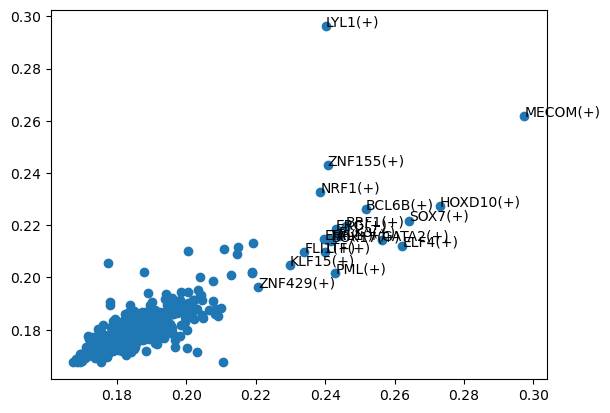

In [69]:
plt.scatter(t['fetal_Capillary arterioles'], t['organoid_Capillary arterioles'])
for c in t['fetal_Capillary arterioles'].sort_values(ascending=False).index[:20]:
    plt.text(t.loc[c,'fetal_Capillary arterioles'], t.loc[c,'organoid_Capillary arterioles'],c)